<a href="https://colab.research.google.com/github/waltoncbullard/Econ-148-Final-Project/blob/main/Econ_148_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ECON 148 Final Project
Authors: Ariana Siordia, Erika Galindo, Leah Perez, Walton Bullard

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from IPython.display import Image
from IPython.display import JSON
from statsmodels.formula.api import ols

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Codebook and Data Upload

## Soccer Data Codebook Detailed Overview

### Identification Variables
- **PLAYER_ID**: Player Identification Number.
- **PLAYER_NAME**: Player Name. Source: ESPN Soccernet.
- **NATIONALITY**: Name of Player Country of Origin. Source: ESPN Soccernet.
- **NATION**: Player Country of Origin (World Bank Country Code). Source: ESPN Soccernet.
- **YEAR**: Soccer Season. Source: ESPN Soccernet.
- **TEAM**: Player Team. Source: ESPN Soccernet.
- **POSITION**: Player Field Position. Source: ESPN Soccernet.
- **LEAGUE**: Player League. Source: ESPN Soccernet.
- **NUM_COUNTRY**: Total observations from player’s country of origin.

### Variables
#### Violence
- **YELLOW_CARD**: Yellow cards per player-season. Source: ESPN Soccernet.
- **RED_CARD**: Red cards per player-season. Source: ESPN Soccernet.

#### Civil Conflict
- **CIVWAR**: Number of civil war years in home country (1980-2005). Source: PRIO/Uppsala Armed Conflict Data.
- **WAR_BEFORE**: Number of civil war years pre-birth. Source: PRIO/Uppsala Armed Conflict Data.
- **WAR_AFTER**: Number of civil war years post-birth. Source: PRIO/Uppsala Armed Conflict Data.

### Control Variables
#### Country Characteristics
- **R_LAW**: Degree of rule of law (2005-2006). Source: Worldwide Governance Indicators (WGI).
- **INCOME**: Income per capita (PPP) (2006 USD). Source: World Development Indicators (2007).
- **LN_INCOME**: Log of income. Source: World Development Indicators (2007).

#### Player Characteristics
- **AGE**: Age. Source: ESPN Soccernet.
- **WEEKLY_WAGE**: Weekly Salary (in ‘000 USD). Sources: Football Manager, 2005, and World Soccer Manager, 2006.
- **LN_WAGE**: Log of weekly_wage. Sources: Football Manager, 2005, and World Soccer Manager, 2006.
- **CONTRACT**: Transfer Fee (in ‘000 USD). Sources: Football Manager, 2005, and World Soccer Manager, 2006.
- **LN_CONTRACT**: Log of contract. Sources: Football Manager, 2005, and World Soccer Manager, 2006.
- **GAMES_START**: Number of games started per player-season. Source: ESPN Soccernet.
- **GAMES_SUB**: Number of games as substitute per player-season. Source: ESPN Soccernet.
- **GOALIE**: Player field position indicator. Coded “1” if goalie, “0” otherwise. Source: ESPN Soccernet.
- **DEFENDER**: Player field position indicator. Coded “1” if defender, “0” otherwise. Source: ESPN Soccernet.
- **FORWARD**: Player field position indicator. Coded “1” if forward, “0” otherwise. Source: ESPN Soccernet.
- **MIDFIELD**: Player field position indicator. Coded “1” if midfield, “0” otherwise. Source: ESPN Soccernet.
- **GOALS**: Number of goals scored per player-season. Source: ESPN Soccernet.

#### Player Regions of Origin
- **AFRICA**: Region of origin indicator. Coded “1” if Africa, “0” otherwise. Source: ESPN Soccernet.
- **ASIA**: Region of origin indicator. Coded “1” if Asia, “0” otherwise. Source: ESPN Soccernet.
- **LAC**: Region of origin indicator. Coded “1” if Latin America or Caribbean, “0” otherwise. Source: ESPN Soccernet.
- **EAST_EUROPE**: Region of origin indicator. Coded “1” if Eastern Europe, “0” otherwise. Source: ESPN Soccernet.
- **OECD**: Region of origin indicator. Coded “1” if OECD, “0” otherwise. Source: ESPN Soccernet.

### Soccer Leagues
- **ENGLISH**: League indicator. Coded “1” if English Premier League, “0” otherwise. Source: ESPN Soccernet.
- **CHAMPIONS**: League indicator. Coded “1” if UEFA Champions League, “0” otherwise. Source: ESPN Soccernet.
- **FRENCH**: League indicator. Coded “1” if French League, “0” otherwise. Source: ESPN Soccernet.
- **GERMAN**: League indicator. Coded “1” if German League


# Data-Cleaning and Pre-Processing

In [ ]:
# We load soccer data.

soccer = pd.read_stata('/content/drive/MyDrive/Colab Notebooks/Econ 148 Final Project /Soccer_Replication/soccer_data.dta')
soccer

,player_id,player_name,war_before,war_after,year,team,nationality,position,age,league,...,oecd,weekly_wage,contract,asia,lac,income,ln_wage,ln_contract,num_country,ln_income
0,2726,Nelson de Jesus Dida,0.0,0.0,2004/05 Statistics,AC Milan,Brazil,G,31,UEFA Champions League,...,0,23000.0,14000000.0,0,1,8800.0,10.043249,16.454567,302,9.082507
1,2726,Nelson de Jesus Dida,0.0,0.0,2004/05 Statistics,AC Milan,Brazil,G,31,Italian Serie A,...,0,23000.0,14000000.0,0,1,8800.0,10.043249,16.454567,302,9.082507
2,2741,Juliano Belletti,0.0,0.0,2004/05 Statistics,Barcelona,Brazil,D,28,Spanish Primera DivisiÛn,...,0,48000.0,8600000.0,0,1,8800.0,10.778956,15.967273,302,9.082507
3,2741,Juliano Belletti,0.0,0.0,2004/05 Statistics,Barcelona,Brazil,D,28,UEFA Champions League,...,0,48000.0,8600000.0,0,1,8800.0,10.778956,15.967273,302,9.082507
4,2749,Cris,0.0,0.0,2004/05 Statistics,Lyon,Brazil,D,27,French Ligue 1,...,0,38000.0,4600000.0,0,1,8800.0,10.545341,15.341567,302,9.082507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,86063,Fatmir Vata,0.0,0.0,2005/06 Statistics,Arminia Bielefeld,Albania,M,33,German Bundesliga,...,0,34500.0,2100000.0,0,0,5840.0,10.448714,14.557447,19,8.672486
5416,86064,Sibusiso Zuma,10.0,13.0,2005/06 Statistics,Arminia Bielefeld,South Africa,F,29,German Bundesliga,...,0,48500.0,4700000.0,0,0,11710.0,10.789319,15.363073,17,9.368198
5417,86073,Michael Fink,0.0,0.0,2005/06 Statistics,Arminia Bielefeld,Germany,M,23,German Bundesliga,...,1,10750.0,1700000.0,0,0,31830.0,9.282661,14.346139,441,10.368164
5418,86110,Andreas Neuendorf,0.0,0.0,2005/06 Statistics,Hertha Berlin,Germany,M,29,German Bundesliga,...,1,NaN,NaN,0,0,31830.0,NaN,NaN,441,10.368164


In [ ]:
# Here we are checking for the presence of ln_contract and league columns in the DataFrame.
# We create a new dataframe, soccer_data, where we remove the rows from the original dataframe, soccer, where the contract column has missing/NaN values.
# Next, we add a new column named ln_contract to our new dataframe that contains the natural logarithm of the values in the contract column.
# Then, we filter soccer_data according to certain attributes.
# Last, we assign this filtered table to soccer. We will move forward with the soccer dataframe.

soccer_data = soccer.dropna(subset=['contract'])
soccer_data['ln_contract'] = np.log(soccer_data['contract'])
filtered_data = soccer_data[
        (soccer_data['num_country'] >= 5) &
        (soccer_data['italian'] | soccer_data['champions'] | soccer_data['english'] |
         soccer_data['french'] | soccer_data['german'] | soccer_data['spanish'])
    ]
soccer = filtered_data.copy()
soccer

<ipython-input-40-1d11da7bcbb5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soccer_data['ln_contract'] = np.log(soccer_data['contract'])


,player_id,player_name,war_before,war_after,year,team,nationality,position,age,league,...,oecd,weekly_wage,contract,asia,lac,income,ln_wage,ln_contract,num_country,ln_income
0,2726,Nelson de Jesus Dida,0.0,0.0,2004/05 Statistics,AC Milan,Brazil,G,31,UEFA Champions League,...,0,23000.0,14000000.0,0,1,8800.0,10.043249,16.454568,302,9.082507
1,2726,Nelson de Jesus Dida,0.0,0.0,2004/05 Statistics,AC Milan,Brazil,G,31,Italian Serie A,...,0,23000.0,14000000.0,0,1,8800.0,10.043249,16.454568,302,9.082507
2,2741,Juliano Belletti,0.0,0.0,2004/05 Statistics,Barcelona,Brazil,D,28,Spanish Primera DivisiÛn,...,0,48000.0,8600000.0,0,1,8800.0,10.778956,15.967273,302,9.082507
3,2741,Juliano Belletti,0.0,0.0,2004/05 Statistics,Barcelona,Brazil,D,28,UEFA Champions League,...,0,48000.0,8600000.0,0,1,8800.0,10.778956,15.967273,302,9.082507
4,2749,Cris,0.0,0.0,2004/05 Statistics,Lyon,Brazil,D,27,French Ligue 1,...,0,38000.0,4600000.0,0,1,8800.0,10.545341,15.341567,302,9.082507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5414,85983,Kevin-Prince Boateng,0.0,0.0,2005/06 Statistics,Hertha Berlin,Germany,M,17,German Bundesliga,...,1,1200.0,2700000.0,0,0,31830.0,7.090077,14.808762,441,10.368164
5415,86063,Fatmir Vata,0.0,0.0,2005/06 Statistics,Arminia Bielefeld,Albania,M,33,German Bundesliga,...,0,34500.0,2100000.0,0,0,5840.0,10.448714,14.557448,19,8.672486
5416,86064,Sibusiso Zuma,10.0,13.0,2005/06 Statistics,Arminia Bielefeld,South Africa,F,29,German Bundesliga,...,0,48500.0,4700000.0,0,0,11710.0,10.789319,15.363073,17,9.368198
5417,86073,Michael Fink,0.0,0.0,2005/06 Statistics,Arminia Bielefeld,Germany,M,23,German Bundesliga,...,1,10750.0,1700000.0,0,0,31830.0,9.282661,14.346139,441,10.368164


In [ ]:
# We list the columns in the soccer dataframe.

list(soccer.columns)

['player_id',
 'player_name',
 'war_before',
 'war_after',
 'year',
 'team',
 'nationality',
 'position',
 'age',
 'league',
 'games_start',
 'games_sub',
 'goals',
 'yellow_card',
 'red_card',
 'nation',
 'defender',
 'forward',
 'goalie',
 'midfield',
 'italian',
 'champions',
 'english',
 'french',
 'german',
 'spanish',
 'r_law',
 'civwar',
 'africa',
 'east_europe',
 'oecd',
 'weekly_wage',
 'contract',
 'asia',
 'lac',
 'income',
 'ln_wage',
 'ln_contract',
 'num_country',
 'ln_income']

In [ ]:
# We load country code data.

wb = pd.read_stata("/content/drive/MyDrive/Colab Notebooks/Econ 148 Final Project /Soccer_Replication/Wb_codes.dta")
wb

,nation,wb_code
0,1,ALB
1,2,DZA
2,3,AGO
3,4,ARG
4,5,ARM
...,...,...
106,107,VEN
107,108,WAL
108,109,YUG
109,110,ZMB


# Modelling

# Regression

In [ ]:
# Here we create all the regressions where data is the soccer data frame, pred_col is the dependant variable, and factors are the independent variable.

def table_2_maker(data, pred_col, factors):
  pred = data[pred_col]
  factor = data[factors]
  factor = sm.add_constant(factor)

  # We build the GLM.
  model = sm.GLM(pred, factor, family = sm.families.NegativeBinomial())
  output = model.fit()
  return output

# We prepare the predictors and ensure constant is added.

def ols_table_2_maker(data, pred_col, factors):
    factor = sm.add_constant(data[factors])
    pred = data[pred_col]

    # We build the OLS model.
    model = sm.OLS(pred, factor)
    results = model.fit()
    return results

In [ ]:
# We create a function summarize_models that extracts the necassary statistics for  the table.
# We start by extracting parameters, t-values, p-values, and number of observations and assigning them to variables.
# Then, we format p-values with their significance levels.
# Then, we format the output string combining parameters, t-values, and significance level. We add the number of observations at the end of the result DataFrame, formatted for Latex. We add a row for regional fixed effects.
# Finally, we concatenate the results.

def summarize_models(models_dict):
    results_df = pd.DataFrame()

    for key, model in models_dict.items():
        params = model.params
        t_values = model.tvalues
        p_values = model.pvalues
        nobs = model.nobs

        sig = p_values.apply(lambda x: '{{' + ('***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else '') + '}}')


        result = pd.DataFrame({
            f'{key}_Result': [f'{{{params[var]:.3f}}} {{ ({t_values[var]:.2f}){sig[var]}}}' for var in params.index]
        }, index=params.index)

        result.loc['N'] = f'N={{ {int(nobs)} }}'

        result.loc['Regional fixed effects'] = '{Yes}'

        results_df = pd.concat([results_df, result], axis=1)

    return results_df

In [ ]:
# These are table subsets to be used in regression later. Regression two requires a special case because there are missing values in the income column that have to be dropped for the regression.

soccer_income_filter = soccer.dropna(subset=['income'])
soccer_income_filter['ln_income'] = np.log(soccer_income_filter['income'])

# The second special case for regression two requires dropping the missing values in the war before and after columns.

soccer_war_filter = soccer.dropna(subset=['war_before'])
soccer_war_filter = soccer_war_filter.dropna(subset=['war_after'])

<ipython-input-45-32b26a305148>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soccer_income_filter['ln_income'] = np.log(soccer_income_filter['income'])


# Visualizations

# Table 1: Descriptive Statistics

In [ ]:
# We reproduce Table 1.
# We produce descriptive statistics for the soccer dataframe.
# Then, we drop the columns corresponding to the 25th, 50th, and 75th percentiles.

Table_1  = soccer.describe().transpose()
Table_1 = Table_1.drop(columns = ['25%', '50%', '75%'])
Table_1


,count,mean,std,min,max
player_id,5035.0,2.263300e+04,1.720554e+04,2726.000000,8.614900e+04
war_before,5033.0,1.484999e+00,3.150539e+00,0.000000,3.300000e+01
war_after,5033.0,2.802901e+00,5.211780e+00,0.000000,3.100000e+01
age,5035.0,2.599285e+01,4.404231e+00,17.000000,4.100000e+01
games_start,5035.0,1.380020e+01,1.148561e+01,0.000000,4.000000e+01
games_sub,5035.0,3.130487e+00,3.897660e+00,0.000000,2.900000e+01
goals,5035.0,1.652632e+00,3.125677e+00,0.000000,3.100000e+01
yellow_card,5035.0,2.434161e+00,2.734036e+00,0.000000,1.600000e+01
red_card,5035.0,1.574975e-01,4.162245e-01,0.000000,3.000000e+00
nation,5035.0,5.371420e+01,2.820538e+01,1.000000,1.080000e+02


# Table 2: Empirical Results: Civil War

In [ ]:
# We create the seven regression models in Table 2 using the function table_2_maker we defined above.
# We summarize the results of our models and produce our final result: Table 2.

models = {
    'Yellow cards (1)': table_2_maker(soccer, 'yellow_card', ['civwar', 'age', 'ln_contract', 'games_start', 'games_sub', 'defender', 'forward', 'midfield', 'goals', 'champions', 'french', 'german', 'spanish', 'africa', 'asia', 'lac', 'east_europe', 'italian']),
    'Yellow cards (2)': table_2_maker(soccer_income_filter, 'yellow_card', ['civwar', 'ln_income', 'age', 'ln_contract', 'games_start', 'games_sub', 'defender', 'forward', 'midfield', 'goals', 'champions', 'french', 'german', 'spanish', 'africa', 'asia', 'lac', 'east_europe', 'italian']),
    'Yellow cards (3)': table_2_maker(soccer, 'yellow_card', ['civwar', 'r_law', 'age', 'ln_contract', 'games_start', 'games_sub', 'defender', 'forward', 'midfield', 'goals', 'champions', 'french', 'german', 'spanish', 'africa', 'asia', 'lac', 'east_europe', 'italian']),
    'Red cards (4)': table_2_maker(soccer, 'red_card', ['civwar', 'r_law', 'age', 'ln_contract', 'games_start', 'games_sub', 'defender', 'forward', 'midfield', 'goals', 'champions', 'french', 'german', 'spanish', 'africa', 'asia', 'lac', 'east_europe', 'italian']),
    'Goals scored (5)': table_2_maker(soccer, 'goals', ['civwar', 'r_law', 'age', 'ln_contract', 'games_start', 'games_sub', 'forward', 'midfield', 'goalie', 'champions', 'french', 'german', 'spanish', 'africa', 'asia', 'lac', 'east_europe', 'italian']),
    'Yellow cards (6)': table_2_maker(soccer_war_filter, 'yellow_card', ['war_before', 'war_after', 'age', 'ln_contract', 'games_start', 'games_sub', 'defender', 'forward', 'midfield', 'goals', 'champions', 'french', 'german', 'spanish', 'africa', 'asia', 'lac', 'east_europe', 'italian']),
    'Red cards (7)': table_2_maker(soccer_war_filter, 'red_card', ['war_before', 'war_after', 'age', 'ln_contract', 'games_start', 'games_sub', 'defender', 'forward', 'midfield', 'goals', 'champions', 'french', 'german', 'spanish', 'africa', 'asia', 'lac', 'east_europe', 'italian']),
}

Table_2 = summarize_models(models)
Table_2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha no

,Yellow cards (1)_Result,Yellow cards (2)_Result,Yellow cards (3)_Result,Red cards (4)_Result,Goals scored (5)_Result,Yellow cards (6)_Result,Red cards (7)_Result
const,{-3.668} { (-9.89){{***}}},{-3.983} { (-5.67){{***}}},{-3.623} { (-9.55){{***}}},{-5.413} { (-6.37){{***}}},{-7.752} { (-16.52){{***}}},{-3.668} { (-9.80){{***}}},{-5.560} { (-6.63){{***}}}
civwar,{0.008} { (1.86){{*}}},{0.008} { (1.86){{*}}},{0.008} { (1.84){{*}}},{0.013} { (1.38){{}}},{0.001} { (0.12){{}}},NaN,NaN
age,{0.015} { (3.35){{***}}},{0.015} { (3.27){{***}}},{0.015} { (3.33){{***}}},{0.015} { (1.48){{}}},{0.019} { (3.22){{***}}},{0.015} { (3.13){{***}}},{0.012} { (1.11){{}}}
ln_contract,{0.049} { (2.27){{**}}},{0.047} { (2.15){{**}}},{0.049} { (2.27){{**}}},{0.073} { (1.51){{}}},{0.312} { (11.32){{***}}},{0.049} { (2.27){{**}}},{0.072} { (1.50){{}}}
games_start,{0.076} { (34.39){{***}}},{0.076} { (34.20){{***}}},{0.076} { (34.40){{***}}},{0.053} { (11.39){{***}}},{0.091} { (34.57){{***}}},{0.076} { (34.36){{***}}},{0.053} { (11.39){{***}}}
games_sub,{0.050} { (9.36){{***}}},{0.050} { (9.25){{***}}},{0.050} { (9.35){{***}}},{0.015} { (1.16){{}}},{0.076} { (12.68){{***}}},{0.051} { (9.38){{***}}},{0.015} { (1.15){{}}}
defender,{1.758} { (17.74){{***}}},{1.756} { (17.70){{***}}},{1.756} { (17.72){{***}}},{1.150} { (5.52){{***}}},NaN,{1.757} { (17.73){{***}}},{1.156} { (5.55){{***}}}
forward,{1.385} { (12.00){{***}}},{1.387} { (11.98){{***}}},{1.383} { (11.99){{***}}},{0.749} { (2.96){{***}}},{1.623} { (24.52){{***}}},{1.384} { (11.99){{***}}},{0.755} { (2.98){{***}}}
midfield,{1.751} { (17.21){{***}}},{1.751} { (17.19){{***}}},{1.750} { (17.19){{***}}},{0.904} { (4.17){{***}}},{0.669} { (11.41){{***}}},{1.751} { (17.20){{***}}},{0.907} { (4.19){{***}}}
goals,{-0.023} { (-3.20){{***}}},{-0.024} { (-3.28){{***}}},{-0.023} { (-3.20){{***}}},{-0.030} { (-1.97){{**}}},NaN,{-0.023} { (-3.18){{***}}},{-0.030} { (-1.94){{*}}}


## Figure 1: Yellow Cards according to type of offense

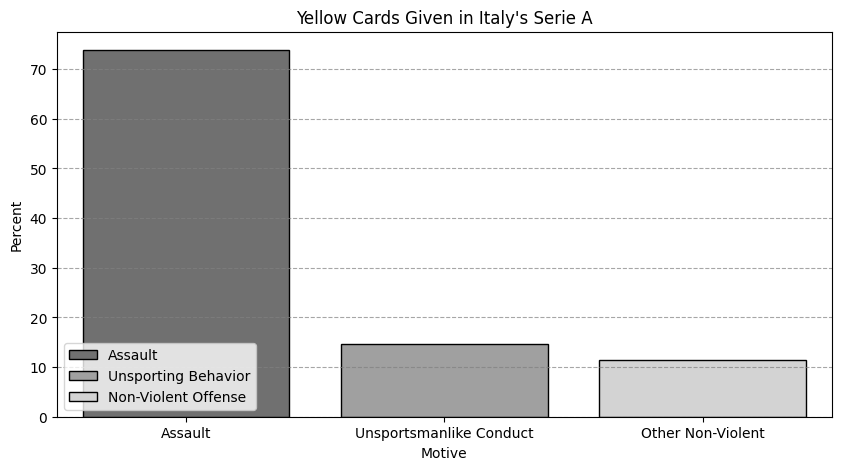

In [ ]:
# We create a bar plot that shows the percent of yellow cards given in italy's serie A by the following motives: assault, unsporting behavior, and non-violent offense.
# We adjust the bar plot so that the bars are touching. We also set specific colors, labels and axis, grid background, and a legend.

percent =  [73.83414988, 14.66158592, 11.5042642]
causes = ['Assault', 'Unsportsmanlike Conduct', 'Other Non-Violent']
shades_of_grey = ['#707070', '#A0A0A0', '#D3D3D3']

fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(causes, percent, color=shades_of_grey, edgecolor='black')

ax.set_xlabel("Motive")
ax.set_ylabel("Percent")
ax.set_title("Yellow Cards Given in Italy's Serie A")

ax.set_xlim(-0.5, len(causes) - 0.5)

ax.legend(bars, ['Assault', 'Unsporting Behavior', 'Non-Violent Offense'], loc='lower left')

ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.7)

plt.show()


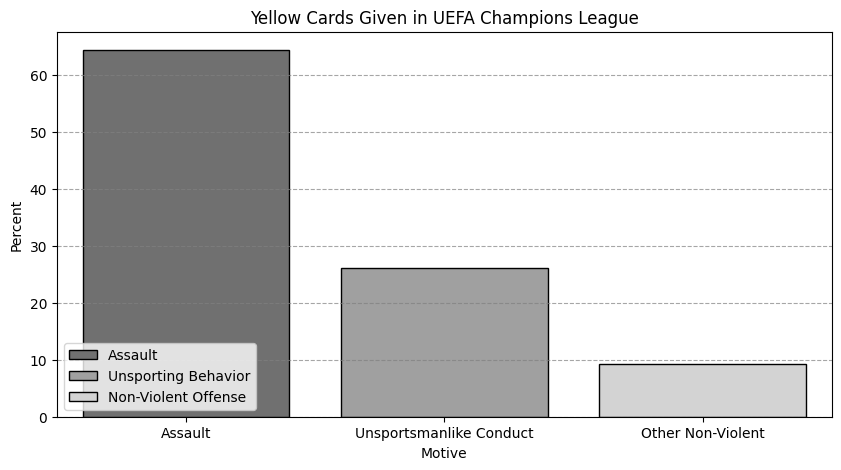

In [ ]:
# We create a second bar plot that shows the percent of yellow cards given in UEFA champions league by the following motives: assault, unsporting behavior, and non-violent offense.
# The figure follows the same criteria as above.

percent = [64.44759207, 26.20396601, 9.348441926]
causes = ['Assault', 'Unsportsmanlike Conduct', 'Other Non-Violent']
shades_of_grey = ['#707070', '#A0A0A0', '#D3D3D3']

fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(causes, percent, color=shades_of_grey, edgecolor='black')

ax.set_xlabel("Motive")
ax.set_ylabel("Percent")
ax.set_title("Yellow Cards Given in UEFA Champions League")

ax.set_xlim(-0.5, len(causes) - .5)

ax.legend(bars, ['Assault', 'Unsporting Behavior', 'Non-Violent Offense'], loc='lower left')

ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.7)

plt.show()

## Figure 2: Yellow cards and civil war (conditional on control variables in Table 2, regression 1) – all countries

In [ ]:
import pandas as pd

# We start by merging the previously loaded soccer_data with wb_codes using the numeric 'nation' column.
# We filter soccer_data based on league flags and minimum number of players.
# Finally, we aggregate the data.

soccer_data_merged = pd.merge(soccer, wb, on='nation', how='left')
soccer_data_merged['num_country'] = soccer_data_merged.groupby('wb_code')['player_id'].transform('size')

filtered_soccer_data = soccer_data_merged[
    (soccer_data_merged['italian'] | soccer_data_merged['champions'] |
     soccer_data_merged['english'] | soccer_data_merged['french'] |
     soccer_data_merged['german'] | soccer_data_merged['spanish']) &
    (soccer_data_merged['num_country'] >= 5)
]

aggregated_data = filtered_soccer_data.groupby('wb_code').agg({
    'yellow_card': 'mean',
    'civwar': 'mean',
    'age': 'mean',
    'games_start': 'mean',
    'games_sub': 'mean',
    'goalie': 'mean',
    'defender': 'mean',
    'forward': 'mean',
    'midfield': 'mean',
    'goals': 'mean',
    'ln_contract': 'mean',
    'italian': 'mean',
    'champions': 'mean',
    'english': 'mean',
    'french': 'mean',
    'german': 'mean',
    'spanish': 'mean',
    'africa': 'mean',
    'asia': 'mean',
    'lac': 'mean',
    'east_europe': 'mean',
    'oecd': 'mean',
    'num_country': 'mean'
}).reset_index()

aggregated_data

,wb_code,yellow_card,civwar,age,games_start,games_sub,goalie,defender,forward,midfield,...,english,french,german,spanish,africa,asia,lac,east_europe,oecd,num_country
0,ALB,2.888889,0.0,29.055556,15.055556,4.055556,0.055556,0.000000,0.277778,0.666667,...,0.000000,0.111111,0.555556,0.000000,0.0,0.0,0.0,1.0,0.0,18.0
1,ARG,2.915730,0.0,25.870787,14.016854,2.887640,0.050562,0.331461,0.235955,0.382022,...,0.033708,0.067416,0.067416,0.365169,0.0,0.0,1.0,0.0,0.0,178.0
2,AUS,2.571429,0.0,27.464286,17.571429,2.428571,0.214286,0.107143,0.214286,0.464286,...,0.642857,0.000000,0.035714,0.000000,0.0,0.0,0.0,0.0,1.0,28.0
3,AUT,1.666667,0.0,25.666667,8.666667,4.666667,0.166667,0.333333,0.166667,0.333333,...,0.166667,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,1.0,6.0
4,BEL,1.911765,0.0,25.588235,9.176471,3.764706,0.029412,0.323529,0.294118,0.352941,...,0.029412,0.147059,0.470588,0.000000,0.0,0.0,0.0,0.0,1.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,USA,0.966667,4.0,25.800000,12.766667,2.600000,0.266667,0.266667,0.200000,0.266667,...,0.533333,0.000000,0.266667,0.000000,0.0,0.0,0.0,0.0,1.0,30.0
64,WAL,2.192308,13.0,29.769231,17.230769,1.769231,0.076923,0.307692,0.230769,0.384615,...,0.884615,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,26.0
65,YUG,2.678571,3.0,27.464286,13.214286,3.375000,0.000000,0.339286,0.375000,0.285714,...,0.089286,0.160714,0.196429,0.178571,0.0,0.0,0.0,1.0,0.0,56.0
66,ZAF,1.066667,9.0,26.866667,10.666667,3.333333,0.000000,0.200000,0.466667,0.333333,...,0.466667,0.000000,0.266667,0.000000,1.0,0.0,0.0,0.0,0.0,15.0


In [ ]:
# We make a list of yellow card factors and civil war factors to use for our regressions.

yellow_factors = ['age', 'civwar', 'games_start', 'games_sub', 'defender', 'forward', 'midfield',
           'goals', 'ln_contract', 'italian', 'champions', 'french', 'german', 'spanish']

war_factors = ['age', 'games_start', 'games_sub', 'defender', 'forward', 'midfield',
           'goals', 'ln_contract', 'italian', 'champions', 'french', 'german', 'spanish', 'africa', 'asia', 'lac', 'east_europe']

# We run the regression model.
# We predict yellowhat using the same model structure. Then, we calculate the residual for yellow_card.

model_result_1 = ols_table_2_maker(aggregated_data, 'yellow_card', yellow_factors)

aggregated_data['yellowhat'] = model_result_1.predict(sm.add_constant(aggregated_data[yellow_factors]))

aggregated_data['yellow_res'] = aggregated_data['yellow_card'] - aggregated_data['yellowhat']

# We run a regression model for civwar.
# We predict  'warhat' using the same model structure and calculate the residual.

model_result_2 = ols_table_2_maker(aggregated_data, 'civwar', war_factors)

aggregated_data['warhat'] = model_result_2.predict(sm.add_constant(aggregated_data[war_factors]))

aggregated_data['war_res'] = aggregated_data['civwar'] - aggregated_data['warhat']

<ipython-input-52-9e1a6c728eb4>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(plot_data['war_res'], results.params[1] * plot_data['war_res'] + results.params[0], 'r', label='Weighted fit', color = 'black')


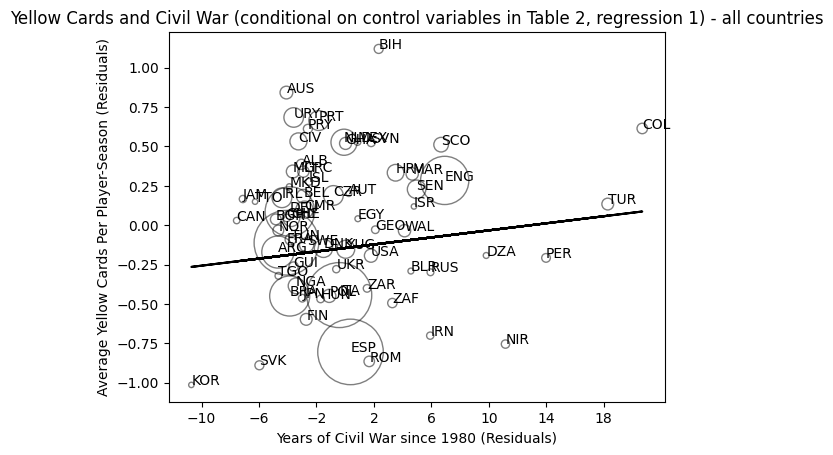

In [ ]:
# We prepare to plot the data for figure 2.
# We reproduce the scatter plot with sizes based on num_country, edgecolor set to black, facecolor removed, and labels for each point.

plot_data = aggregated_data[['wb_code', 'yellow_res', 'war_res', 'num_country']]

fig, ax = plt.subplots()

scatter = ax.scatter(plot_data['war_res'], plot_data['yellow_res'],
                     s=plot_data['num_country']*3,
                     alpha=0.5, edgecolor='black', facecolor='none')

for i, txt in enumerate(plot_data['wb_code']):
    ax.annotate(txt, (plot_data['war_res'].iloc[i], plot_data['yellow_res'].iloc[i]))

# We add a constant term to the predictor for better modeling.

X = sm.add_constant(plot_data['war_res'])
wls_model = sm.WLS(plot_data['yellow_res'], X, weights=plot_data['num_country'])
results = wls_model.fit()

# We plot the weighted line of best fit. Finally, we set the labels, titles, and axes.

ax.plot(plot_data['war_res'], results.params[1] * plot_data['war_res'] + results.params[0], 'r', label='Weighted fit', color = 'black')

ax.set_xlabel('Years of Civil War since 1980 (Residuals)')
ax.set_ylabel('Average Yellow Cards Per Player-Season (Residuals)')
ax.set_title('Yellow Cards and Civil War (conditional on control variables in Table 2, regression 1) - all countries')
plt.yticks(np.arange(-1, 1.25, 0.25))
plt.xticks(np.arange(-10, 19, 4))

plt.show()

## Figure 3: Yellow cards and civil war (conditional on control variables in Table 2, regression 1) – non-OECD countries

<ipython-input-53-328b1d02a8ad>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(plot_data['war_res'], results.params[1] * plot_data['war_res'] + results.params[0], 'r', label='Weighted fit', color = 'black')


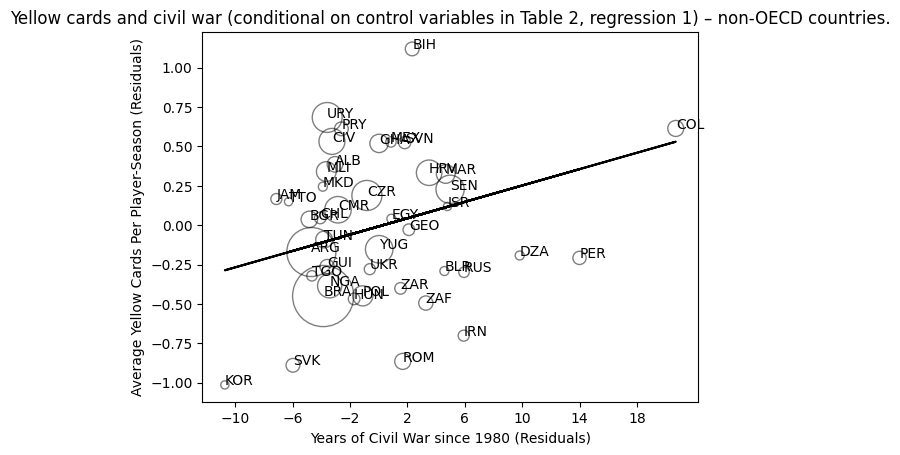

In [ ]:
# We prepare data to plot for figure 3. Here, we remove OECD countries.
# We reproduce the scatter plot with sizes based on num_country, edgecolor set to black, facecolor removed, and labels for each point.

non_oecd_data = aggregated_data[aggregated_data['oecd'] == 0]
plot_data = non_oecd_data[['wb_code', 'yellow_res', 'war_res', 'num_country']]

fig, ax = plt.subplots()

scatter = ax.scatter(plot_data['war_res'], plot_data['yellow_res'],
                     s=plot_data['num_country']*7,
                     alpha=0.5, edgecolor='black', facecolor='none')

for i, txt in enumerate(plot_data['wb_code']):
    ax.annotate(txt, (plot_data['war_res'].iloc[i], plot_data['yellow_res'].iloc[i]))

# We add a constant term to the predictor for better modeling.

X = sm.add_constant(plot_data['war_res'])
wls_model = sm.WLS(plot_data['yellow_res'], X, weights=plot_data['num_country'])
results = wls_model.fit()

# We plot the weighted line of best fit. Finally, we set the labels, titles, and axes.

ax.plot(plot_data['war_res'], results.params[1] * plot_data['war_res'] + results.params[0], 'r', label='Weighted fit', color = 'black')

ax.set_xlabel('Years of Civil War since 1980 (Residuals)')
ax.set_ylabel('Average Yellow Cards Per Player-Season (Residuals)')
ax.set_title('Yellow cards and civil war (conditional on control variables in Table 2, regression 1) – non-OECD countries.')
plt.yticks(np.arange(-1, 1.25, 0.25))
plt.xticks(np.arange(-10, 19, 4))

plt.show()

## Figure 4: Yellow cards and civil war (conditional on control variables in Table 2, regression 1) – non-OECD countries, excluding Colombia, Iran, Israel, Peru, and Turkey

<ipython-input-54-3ac9deb87b16>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(plot_data['war_res'], results.params[1] * plot_data['war_res'] + results.params[0], 'r', label='Weighted fit', color = 'black')


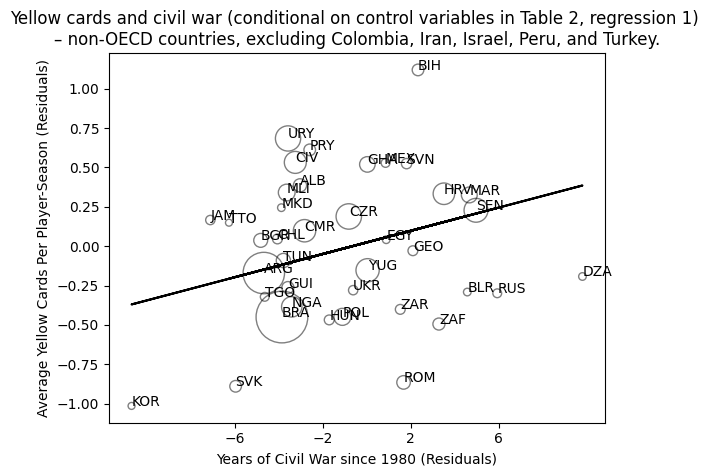

In [ ]:
# We prepare data to plot for figure 4. Here, we remove OECD countries, excluding Columbia, Iran, Israel, Peru, and Turkey.
# We reproduce the scatter plot with sizes based on num_country, edgecolor set to black, facecolor removed, and labels for each point.

countries_to_exclude = ['COL', 'IRN', 'ISR', 'PER', 'TUR']

filtered_data = aggregated_data[~aggregated_data['wb_code'].isin(countries_to_exclude)]
non_oecd_and_excluded_data = filtered_data[filtered_data['oecd'] == 0]

plot_data = non_oecd_and_excluded_data[['wb_code', 'yellow_res', 'war_res', 'num_country']]

fig, ax = plt.subplots()

scatter = ax.scatter(plot_data['war_res'], plot_data['yellow_res'],
                     s=plot_data['num_country']*5,
                     alpha=0.5, edgecolor='black', facecolor='none')

for i, txt in enumerate(plot_data['wb_code']):
    ax.annotate(txt, (plot_data['war_res'].iloc[i], plot_data['yellow_res'].iloc[i]))

# We add a constant term to the predictor for better modeling.

X = sm.add_constant(plot_data['war_res'])
wls_model = sm.WLS(plot_data['yellow_res'], X, weights=plot_data['num_country'])
results = wls_model.fit()

# We plot the weighted line of best fit. Finally, we set the labels, titles, and axes.

ax.plot(plot_data['war_res'], results.params[1] * plot_data['war_res'] + results.params[0], 'r', label='Weighted fit', color = 'black')

ax.set_xlabel('Years of Civil War since 1980 (Residuals)')
ax.set_ylabel('Average Yellow Cards Per Player-Season (Residuals)')
ax.set_title('Yellow cards and civil war (conditional on control variables in Table 2, regression 1) \n– non-OECD countries, excluding Colombia, Iran, Israel, Peru, and Turkey.')
plt.yticks(np.arange(-1, 1.25, 0.25))
plt.xticks(np.arange(-6, 7, 4))

plt.show()